## Traveller Salesman Problem

The TSP involves finding the shortest possible route that visits all given cities exactly once and returns to the starting point.

In [2]:
!pip install networkx
!pip install numpy
!pip install faker
!pip install pandas
!pip install networkx matplotlib


  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------- ----------------------- 5.2/12.9 MB 24.5 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.9 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 23.1 MB/s eta 0:00:00
  Using cached Faker-33.1.0-py3-none-any.whl.metadata (15 kB)
Using cached Faker-33.1.0-py3-none-any.whl (1.9 MB)
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached matplotlib-3.9.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using c

In [34]:
import networkx as nx
import numpy as np
import random as rd
from faker import Faker
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

In [4]:
faker = Faker()
rd.seed = 10

In [5]:
NUM_CITIES = 10
NUM_CONECTIONS = 25

In [6]:
class City:
    def __init__(self, position:np.array, name = 'Default'):
        self.name = name
        self.position = position
        self.color = faker.color()
    
    def getJsonStyle(self):
        return {
            'color': self.color
        }
    


In [7]:
#---------------- Creating 10 random cities --------------#

random_cities = [City(position=np.array([rd.randint(0,100), rd.randint(0,100)]), name =str(faker.city())) for i in range(NUM_CITIES)]

data_frame = pd.DataFrame(
    data = {
        'name': [city.name for city in random_cities],
        'position': [city.position for city in random_cities],
        'color': [city.color for city in random_cities]
    }
)

data_frame.head()


,name,position,color
0,Tranburgh,"[23, 58]",#afe5ed
1,South Mirandafurt,"[6, 29]",#d1b02e
2,Nicholasshire,"[88, 8]",#cc9022
3,East Justinmouth,"[76, 78]",#f0f291
4,East Rogerborough,"[8, 8]",#f79ec6


In [8]:
#------------- Creating networks -------------#

def getRandomUnion(list_obj: list, no_list: list):
    max_iter = 1000
    count = 0
    while(True):
        sample1 = rd.sample(list_obj, 2)
        sample2 = rd.sample([obj for obj in list_obj if obj != sample1], 1)
        union = [sample1, sample2]
        count+=1
        if(not union in no_list):
            return union
        if(count > max_iter):
            print('Upon max iteration')
            break


#1) Creating the random net between the cities
random_net = []
random_net = [rd.sample(random_cities, 2) for i in range(NUM_CONECTIONS)]
random_net


[[<__main__.City at 0x2052580d910>, <__main__.City at 0x2052580d510>],
 [<__main__.City at 0x2052580ced0>, <__main__.City at 0x2052580dc50>],
 [<__main__.City at 0x2052580d0d0>, <__main__.City at 0x2052580d910>],
 [<__main__.City at 0x2052580dc50>, <__main__.City at 0x2052580d0d0>],
 [<__main__.City at 0x2052580ced0>, <__main__.City at 0x20525045210>],
 [<__main__.City at 0x2052580d510>, <__main__.City at 0x20525045210>],
 [<__main__.City at 0x2052580ced0>, <__main__.City at 0x2052514d410>],
 [<__main__.City at 0x2052580dc50>, <__main__.City at 0x2052580d0d0>],
 [<__main__.City at 0x2052580dc50>, <__main__.City at 0x20525045210>],
 [<__main__.City at 0x2052514d410>, <__main__.City at 0x20525328990>],
 [<__main__.City at 0x2052514d410>, <__main__.City at 0x2052580db90>],
 [<__main__.City at 0x2052580db90>, <__main__.City at 0x2052580ced0>],
 [<__main__.City at 0x2052514d410>, <__main__.City at 0x2052580d510>],
 [<__main__.City at 0x2052580db90>, <__main__.City at 0x2052580d910>],
 [<__m

In [9]:
# Creating the grapth

G = nx.Graph()
G.add_nodes_from([(city, city.getJsonStyle()) for city in random_cities])
G.add_edges_from(random_net)
nx.set_edge_attributes(
    G,
    {
        edge: np.linalg.norm(
            edge[0].position-edge[1].position
        ).round()
        for edge in list(G.edges())
    },
    'distance'
)

In [10]:
#------------Visualization----------
node_labels = {node: node.name for node in G.nodes()}
edge_labels = nx.get_edge_attributes(G, "distance")
node_colors = [node.color for node in G.nodes()]
pos = nx.spring_layout(G, scale = 100, seed= 5)
label_pos = {node: pos[node] + np.array([0,6]) for node in pos}

[]

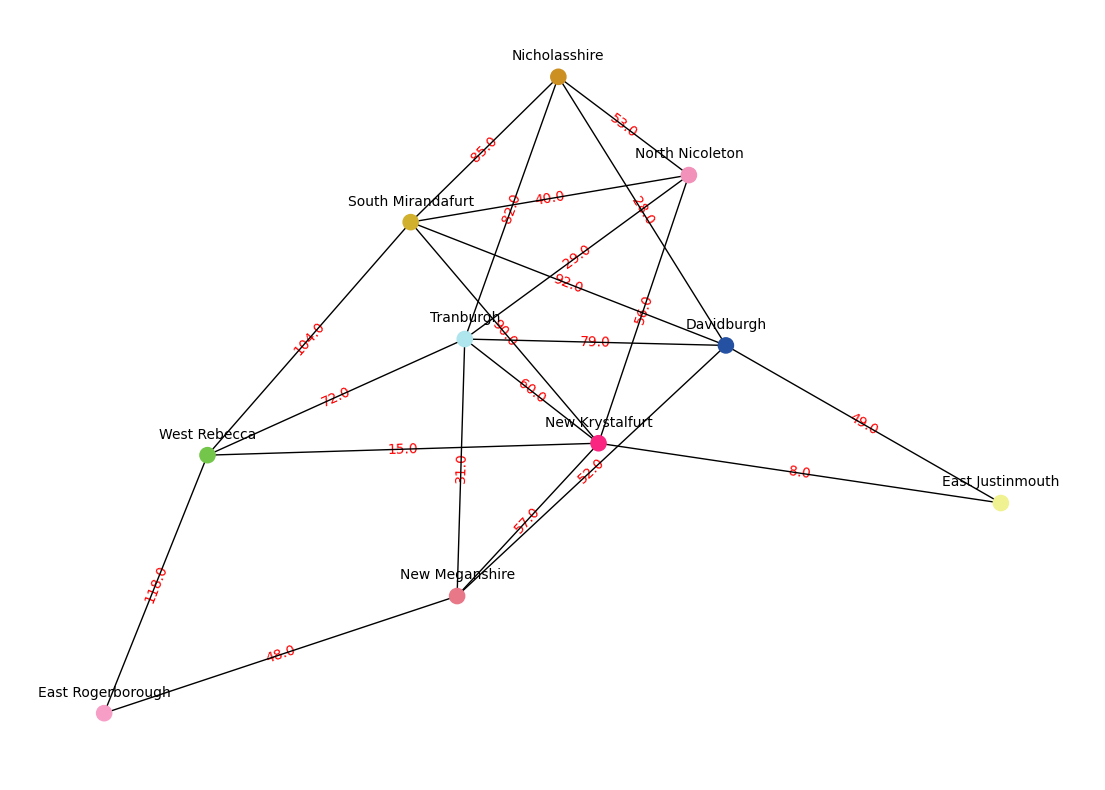

In [13]:
plt.figure(figsize=(14,10))

nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=10, font_color="black")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=10, font_color="red")
nx.draw(G, pos,  with_labels = False, node_color = node_colors, node_size = 120,)
plt.plot()

We have alerady the city object. Now we want to look for the sortest way to join all this citys. From now to on, a fitness function is necesary to mesure how as good is a way in compare of a nother. This fitness function coud be for example the sum of all distances between citys as we pass between theirs.

In this case, a way are going to be a subgraph from the meain graph called G.

In [33]:
def checkSubgrapth(subgraph: nx.Graph, G: nx.Graph) -> bool:
    """
    This function check if a potetial solution of the problem (subgraph) is 
    a valid solution. A valid solution is which cross over all the citys.
    """
    return subgraph.nodes == G.nodes



def fitness(subgraph: nx.Graph, G:nx.Graph) -> float:
    """ 
    Given a subgraph this function returns how good this solution is. If this solution
     is not valid (becaouse dont solve the problem), will return 0, in other way, will return 
      a value between 0 and 1.

      Lower dintance corresponds to higher fitness 
    """

    if(not checkSubgrapth(subgraph=subgraph, G=G)):
        return 0
    # This returns a dictionary of edges with the nex format
    # { (city1, city2): float, ... }
    edges = nx.get_edge_attributes(subgraph, 'distance')
    edges_values = edges.values()
    return 1/np.sum(list(edges_values))
  

fitness(subgraph=G, G=G)

np.float64(0.0008012820512820513)

We need a function to create ways in a wasy ways, for example from a list of citys.

In [ ]:
def create_way (citys_visited: List[City], G: nx.Graph) -> nx.Graph:
    """
    This function takes a list of City objects and create a subgraph from 
    the main graph G.

    """


list_citys = rd.sample(random_citiesm, G.node)
create_way([])